In [3]:
import math
import numpy as np
import plotly as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import Parallel, delayed
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# View Config
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 400)

In [5]:
# leximi i datasetit
df = pd.read_csv('banking_dataset_clean.csv')

In [9]:
df.head()

customer_id    Name   Surname Account Number  Age Occupation Risk Tolerance     Investment Goals  Income Level                                           Address  Account Balance  Deposits  Withdrawals  Transfers  International Transfers  Investments  Loan Amount      Loan Purpose Employment Status  Loan Term (Months) Interest Rate Loan Status                                            Transaction Description  Default
0            1   Emily     Lewis      ACC000001   40     Lawyer           High  Wealth Preservation      46044.94       7168 Moody Meadow\nHernandezshire, PW 06016         44653.26   9156.01      9327.70    3647.92                    82.80      8729.30     27010.93  Medical Expenses           Retired                  36        11.94%     pending  Electronics transaction of $706.18 at Sanders, Roberts and Hughes        0
1            2    John   Baldwin      ACC000002   30    Teacher            Low  Wealth Preservation      57169.50      50001 Hector Square\nWest Luisfurt, MA 51935         29175.47   5933.22      8671.60    6729.86                   819.69      4545.18     31266.97     Auto Purchase           Retired                  36         8.08%    approved                            Transaction at Evans-Smith for $2250.03        0
2            3  Nathan      Carr      ACC000003   37    Teacher            Low          Speculation      71760.86       997 James Isle\nNorth Rebeccafurt, RI 13366         86141.59  22583.11     16468.58    6032.53                  1526.33      8251.45     41260.58     Auto Purchase          Employed                  12        13.07%     pending             Purchase at Taylor-Gutierrez for $615.85 on 2024-02-21        0
3            4  Thomas    Miller      ACC000004   27    Student         Medium          Speculation     -25488.15  1607 Joshua Camp Apt. 634\nConleymouth, CT 66479          1000.00    299.47       289.09     109.83                     3.51       195.73      5000.00    Small Business           Retired                  60         6.73%    approved                    Travel transaction of $4852.39 at Jones-Russell        1
4            5  Robert  Williams      ACC000005   36   Engineer            Low    Income Generation     106777.95       96690 Campbell Common\nDwaynetown, MI 71857         77918.97  13853.25     22699.32   12189.32                  2152.51      9725.21     50000.00  Medical Expenses          Employed                  24        10.60%    approved      Purchase at Jensen, Porter and Webb for $562.22 on 2024-01-26        0

In [11]:
df.describe()

customer_id          Age   Income Level  Account Balance      Deposits   Withdrawals     Transfers  International Transfers   Investments   Loan Amount  Loan Term (Months)      Default
count  5000.000000  5000.000000    5000.000000      5000.000000   5000.000000   5000.000000   5000.000000              5000.000000   5000.000000   5000.000000         5000.000000  5000.000000
mean   2500.500000    51.875600   70688.726308     61885.468640  18524.016958  10893.201990   9213.199010              1364.433670   9623.755168  37969.199626           36.235200     0.007600
std    1443.520003    19.579888   29713.751491     33232.359614  12800.552754   7738.324411   6354.272959              1361.190087   7694.323600  15085.146562           17.014705     0.086855
min       1.000000    18.000000  -33320.970000      1000.000000    102.940000     50.500000     51.990000                 0.010000     51.220000   5000.000000           12.000000     0.000000
25%    1250.750000    35.000000   50478.670000     31677.750000   8074.702500   4490.922500   3900.710000               346.820000   3982.700000  25601.035000           24.000000     0.000000
50%    2500.500000    52.000000   70495.835000     63555.575000  15826.715000   9147.465000   7913.995000               896.990000   7662.605000  48851.170000           36.000000     0.000000
75%    3750.250000    69.000000   91100.377500    100000.000000  27165.697500  16068.990000  13608.220000              1961.130000  13400.980000  50000.000000           48.000000     0.000000
max    5000.000000    85.000000  185124.370000    100000.000000  49992.090000  29996.720000  24991.810000              7446.620000  39981.520000  50000.000000           60.000000     1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              5000 non-null   int64  
 1   Name                     5000 non-null   object 
 2   Surname                  5000 non-null   object 
 3   Account Number           5000 non-null   object 
 4   Age                      5000 non-null   int64  
 5   Occupation               5000 non-null   object 
 6   Risk Tolerance           5000 non-null   object 
 7   Investment Goals         5000 non-null   object 
 8   Income Level             5000 non-null   float64
 9   Address                  5000 non-null   object 
 10  Account Balance          5000 non-null   float64
 11  Deposits                 5000 non-null   float64
 12  Withdrawals              5000 non-null   float64
 13  Transfers                5000 non-null   float64
 14  International Transfers 

In [15]:
df.columns

Index(['customer_id', 'Name', 'Surname', 'Account Number', 'Age', 'Occupation', 'Risk Tolerance', 'Investment Goals', 'Income Level', 'Address', 'Account Balance', 'Deposits', 'Withdrawals', 'Transfers', 'International Transfers', 'Investments', 'Loan Amount', 'Loan Purpose', 'Employment Status', 'Loan Term (Months)', 'Interest Rate', 'Loan Status', 'Transaction Description', 'Default'], dtype='object')

In [15]:
numerical_col = ['Age','Income Level', 'Account Balance', 'Deposits', 'Withdrawals', 'Transfers', 'International Transfers', 'Investments', 'Loan Amount', 'Loan Term (Months)']

In [17]:
X = df[numerical_col]

In [19]:
X.describe()

Age   Income Level  Account Balance      Deposits   Withdrawals     Transfers  International Transfers   Investments   Loan Amount  Loan Term (Months)
count  5000.000000    5000.000000      5000.000000   5000.000000   5000.000000   5000.000000              5000.000000   5000.000000   5000.000000         5000.000000
mean     51.875600   70688.726308     61885.468640  18524.016958  10893.201990   9213.199010              1364.433670   9623.755168  37969.199626           36.235200
std      19.579888   29713.751491     33232.359614  12800.552754   7738.324411   6354.272959              1361.190087   7694.323600  15085.146562           17.014705
min      18.000000  -33320.970000      1000.000000    102.940000     50.500000     51.990000                 0.010000     51.220000   5000.000000           12.000000
25%      35.000000   50478.670000     31677.750000   8074.702500   4490.922500   3900.710000               346.820000   3982.700000  25601.035000           24.000000
50%      52.000000   70495.835000     63555.575000  15826.715000   9147.465000   7913.995000               896.990000   7662.605000  48851.170000           36.000000
75%      69.000000   91100.377500    100000.000000  27165.697500  16068.990000  13608.220000              1961.130000  13400.980000  50000.000000           48.000000
max      85.000000  185124.370000    100000.000000  49992.090000  29996.720000  24991.810000              7446.620000  39981.520000  50000.000000           60.000000

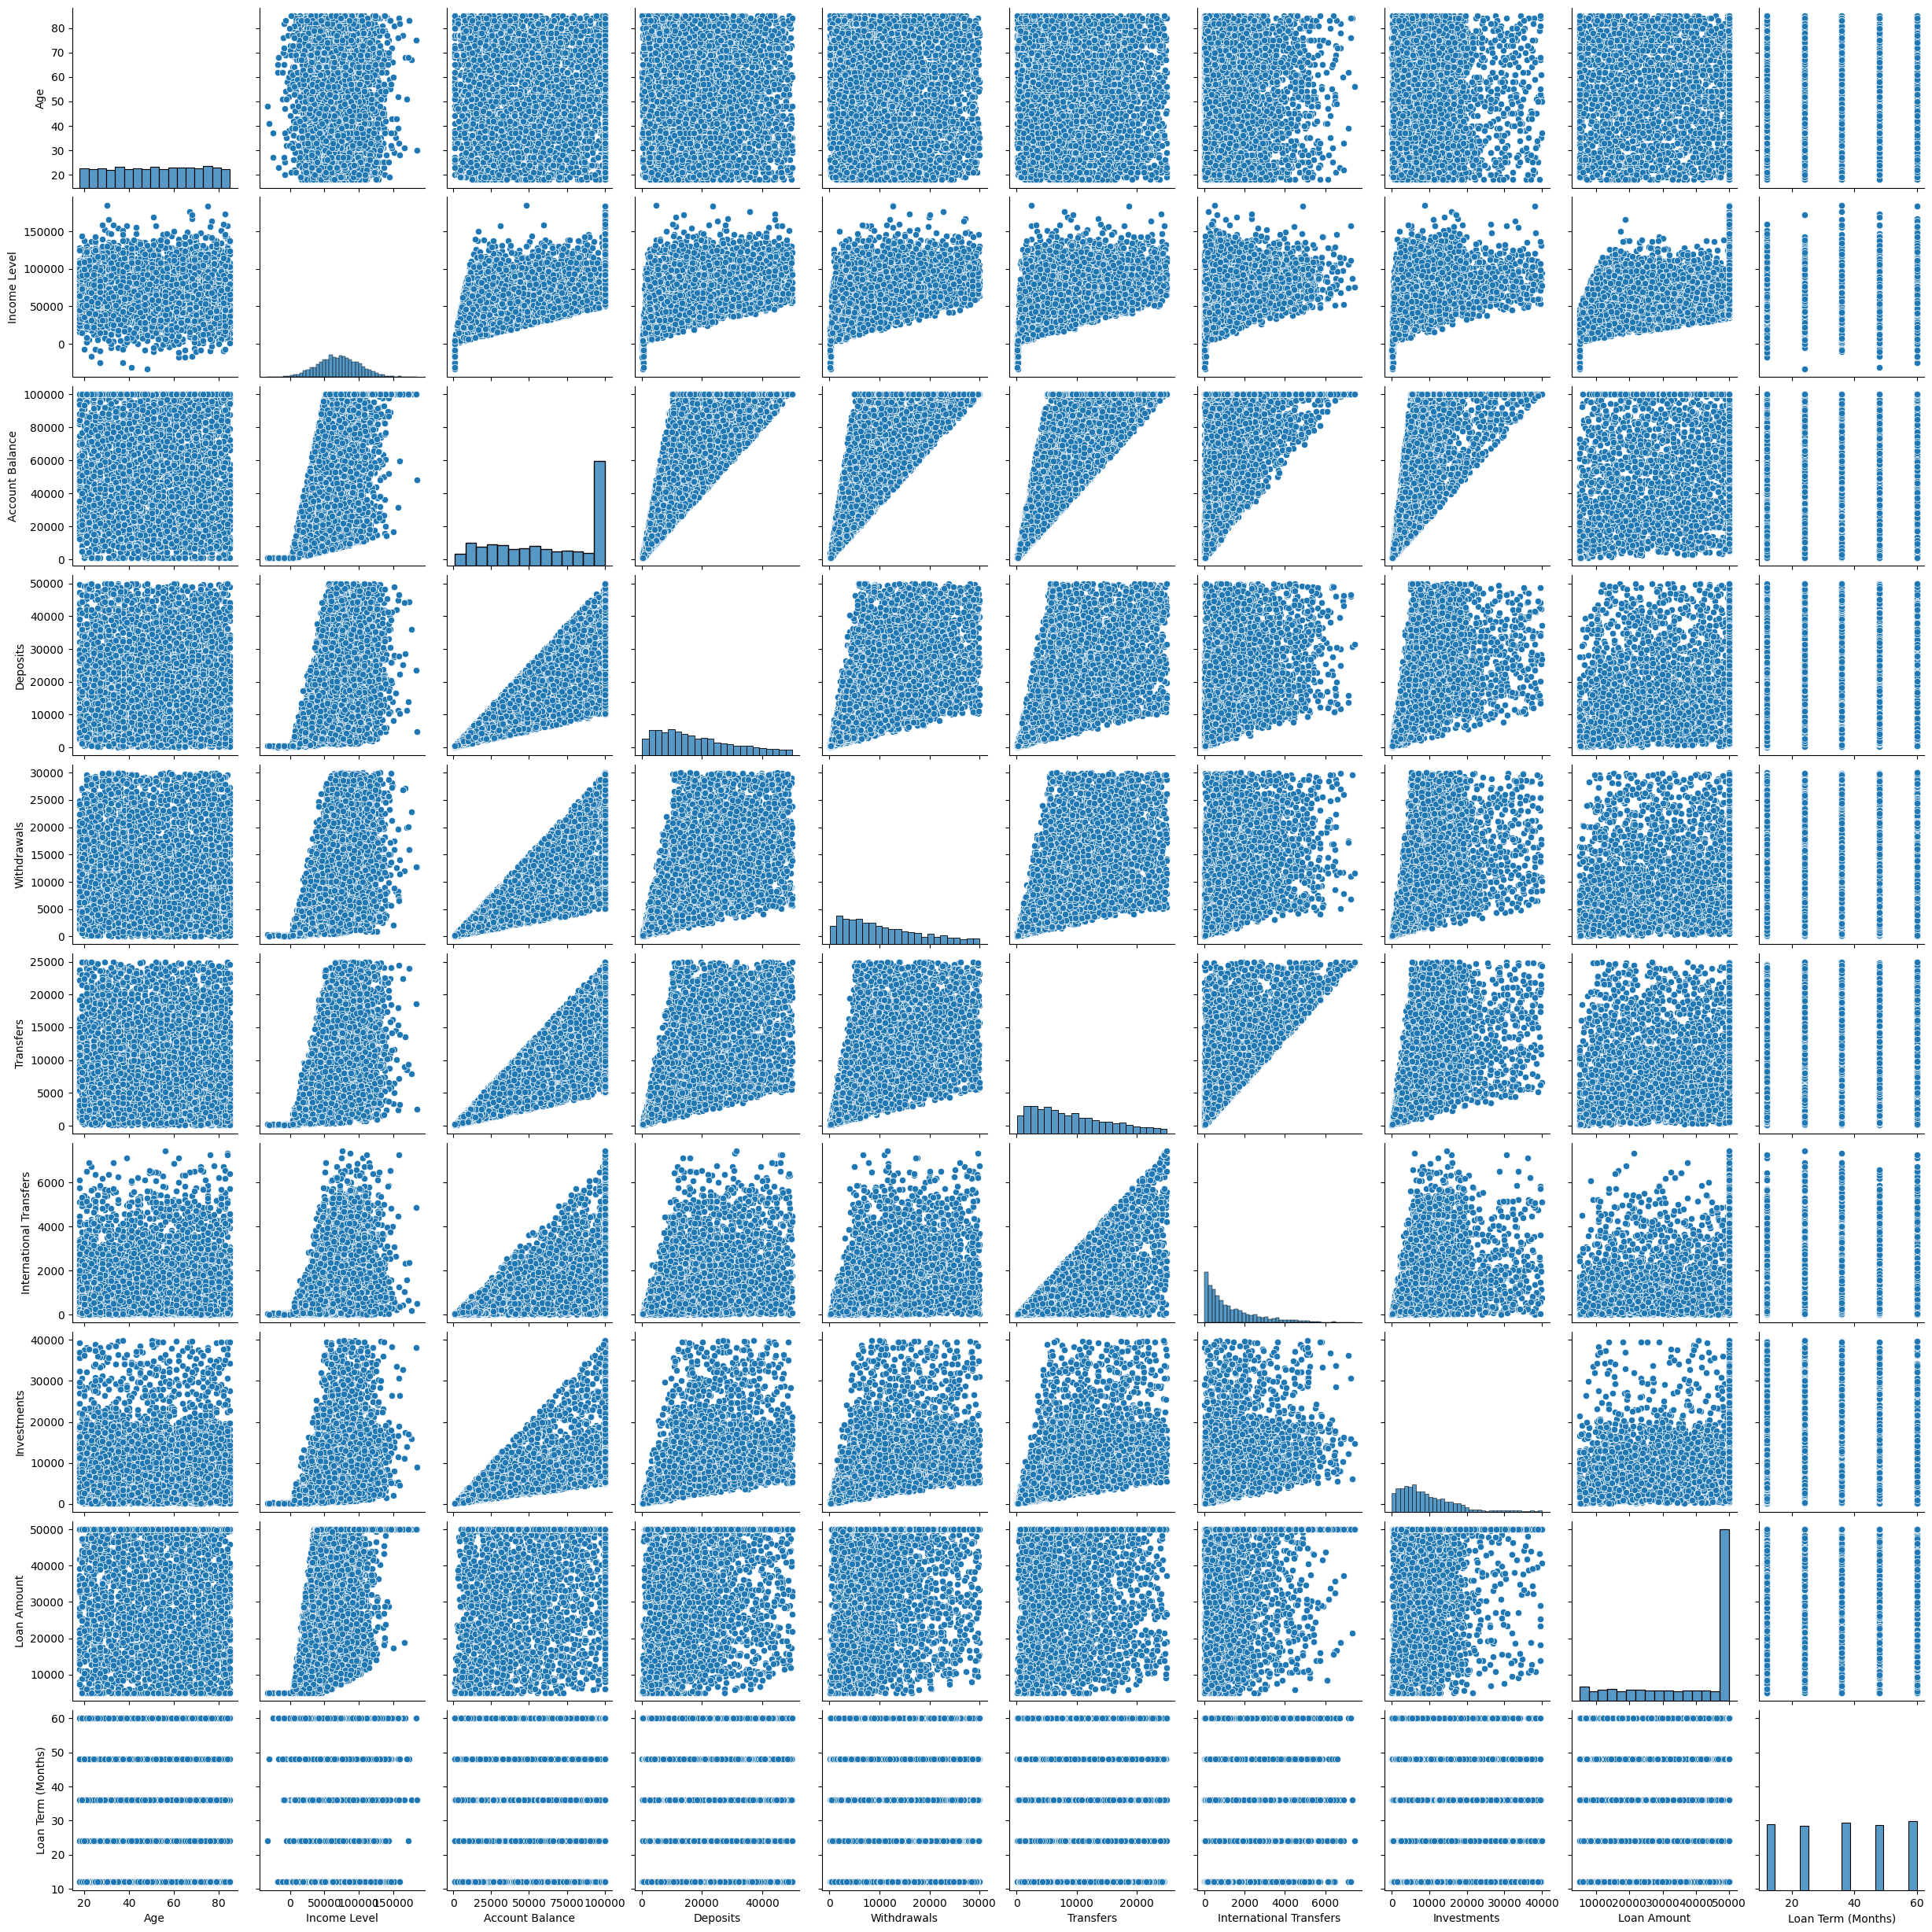

In [39]:
sns.pairplot(data=X)
plt.show()

In [57]:
y = df['Default']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
model = LogisticRegression( random_state=42).fit(X_train, y_train)

In [83]:
predictions = model.predict(X_test)

In [93]:
accuracy = model.score(X_test, y_test)

print(accuracy)

0.9993333333333333
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [103]:
print("Absolute Mean Error: ", mean_absolute_error(y_test, predictions))
print("Squared Mean Error: ", mean_squared_error(y_test, predictions))
print("Root Squared Mean Error: ", math.sqrt(mean_squared_error(y_test, predictions)) )

Absolute Mean Error:  0.0006666666666666666
Squared Mean Error:  0.0006666666666666666
Root Squared Mean Error:  0.025819888974716113


In [77]:
model = LogisticRegression( random_state=42).fit(X, y)

In [109]:
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

# Load the model from the file
model_from_file = joblib.load('model.pkl')

# Use the loaded model to make predictions
model_from_file.score(X_test, y_test)

0.9993333333333333